In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATASET_PATH = "/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml"
DATASET_PATH

'/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml'

In [3]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Entraîner YOLOv11n - 20 epoch

In [ ]:
start_time = time.time()

model = YOLO("yolo11n.pt")

results = model.train(
    data=DATASET_PATH,
    epochs=20,
    imgsz=640,
    batch=16,
    name="bird_v11_train"
)

end_time = time.time()

print(f"\n⏱️ Temps total d'entraînement : { (end_time - start_time)/60:.2f} minutes")

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11_train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

YOLOv11n — 20 epochs

- Précision (P) : 0.733

Sur 100 prédictions positives, ~73 sont correctes.

- Recall (R) : 0.706

Le modèle détecte ~70% de tous les oiseaux présents.

- mAP50 : 0.743

Score très solide pour YOLO11n, surtout en only-20 epochs.

- mAP50-95 : 0.399

Excellent pour un modèle aussi petit.


pour info : "any mAP50-95 score above 0.4 is considered ok" de ce que j'ai vu dans le repo https://github.com/freida20git/bird-detection-tracking/blob/main/detection/birds_training_detection.ipynb




## Sauvegarder automatiquement le modèle

In [ ]:
import shutil

SOURCE = "/content/runs/detect/bird_v11_train2/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11n_best_ep20.pt"

shutil.copy(SOURCE, DEST)

print("✔️ Modèle sauvegardé dans le Drive :", DEST)

✔️ Modèle sauvegardé dans le Drive : /content/drive/MyDrive/bird_v11n_best_ep20.pt


## Tester une image

In [ ]:
!ls /content/drive/MyDrive

'Albane COIFFE_Documents.pdf'
'Analyse des données DVF.gslides'
'Attestation_sécurité_sociale_Albane Coiffe.pdf'
 Bird_Only.v1i.yolov11
 bird_v11n_best_ep20.pt
'Colab Notebooks'
 Data-20251126
'data management and ethics.gdoc'
 DSC_0361.JPG
 hawk-data.gdoc
 IMG_0004.JPG
 IMG_5435.MOV
"Les crets d'eau.docx"
"Les crets d'eau.pages"
 model2.pt
 OneDrive_2023-12-04.zip
"pièce d'identité - Albane COIFFE.pdf"
 PKLot_cleaned
 PSX_20210417_235931.jpg
'Rapport de progression.gslides'
"Rapport d'etonnement.pages"
'Rapport stage.gdoc'
'rapport v2.gdoc'


In [ ]:
!ls /content/runs/detect/bird_v11_train2/weights/

best.pt  last.pt


In [ ]:
modelv11n_best_ep20 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep20.pt")


image 1/1 /content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg: 640x640 16 Birds, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: 0.425, BBox: [213.56948852539062, 286.23345947265625, 233.31607055664062, 326.9539794921875]
Confidence: 0.397, BBox: [118.66075134277344, 238.9632568359375, 138.94554138183594, 280.8330078125]
Confidence: 0.383, BBox: [314.8998107910156, 375.225341796875, 335.5852355957031, 414.3546142578125]
Confidence: 0.375, BBox: [263.35113525390625, 298.8396911621094, 282.73785400390625, 338.9563903808594]
Confidence: 0.367, BBox: [285.96942138671875, 394.7930908203125, 305.04376220703125, 424.2647705078125]
Confidence: 0.359, BBox: [302.8834228515625, 323.0958251953125, 325.274169921875, 364.90997314453125]
Confidence: 0.348, BBox: [379.305908203125, 348.1947326660156, 401.30224609375, 382.6454772949219]
Confidence: 0.342, BBox: [178.49325561523438, 2

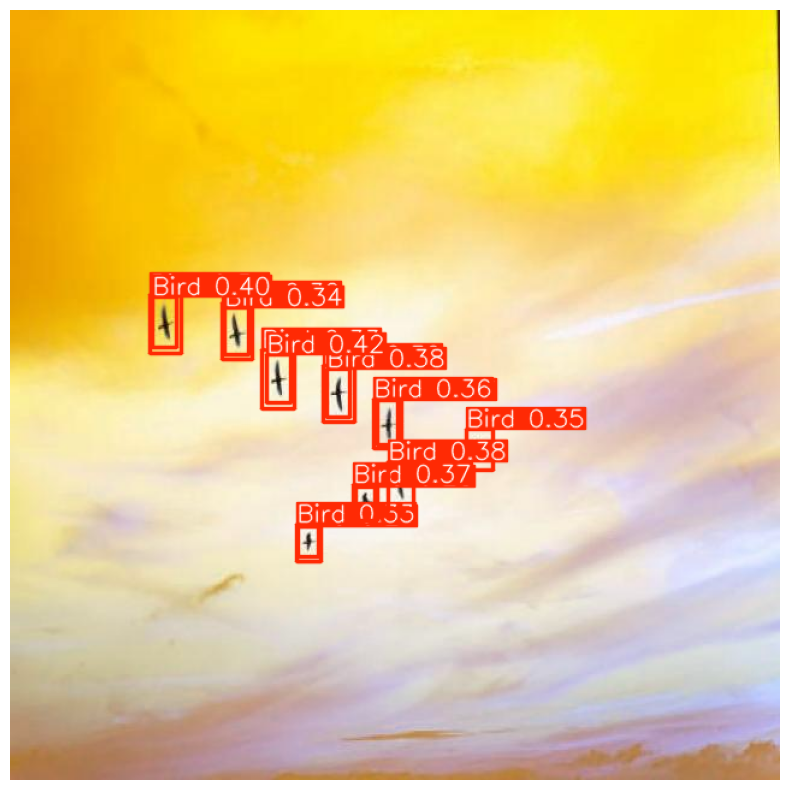

In [ ]:
results = modelv11n_best_ep20.predict(
    source="/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg"
)

annotated = results[0].plot()

plt.figure(figsize=(10,10))
plt.imshow(annotated)
plt.axis("off")

for box in results[0].boxes:
    conf = float(box.conf)
    xyxy = box.xyxy[0].tolist()
    print(f"Confidence: {conf:.3f}, BBox: {xyxy}")

=> Presque chaque box est compté 2 fois

## YOLO11n - 70 epoch

In [ ]:
model.train(
    data=DATASET_PATH,
    epochs=70,
    imgsz=640,
    batch=16,
    name="bird_v11_train70"
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/bird_v11n_best_ep20.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11_train70, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5b7bd65c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

| Metric        | 20 epochs | 70 epochs | Gain    |
| ------------- | --------- | --------- | ------- |
| **Precision** | 0.733     | **0.774** | +4.1% |
| **Recall**    | 0.706     | **0.747** | +4.1% |
| **mAP50**     | 0.743     | **0.786** | +4.3% |
| **mAP50-95**  | 0.399     | **0.437** | +3.8% |


In [ ]:
import shutil

SOURCE = "/content/runs/detect/bird_v11_train70/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11n_best_ep70.pt"

shutil.copy(SOURCE, DEST)

print("Nouveau modèle 70 epochs sauvegardé dans :", DEST)

Nouveau modèle 70 epochs sauvegardé dans : /content/drive/MyDrive/bird_v11n_best_ep70.pt


In [ ]:
modelv11n_best_ep70 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep70.pt")


image 1/1 /content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg: 640x640 10 Birds, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Confidence: 0.605, BBox: [214.4568634033203, 288.49664306640625, 232.9383087158203, 324.19451904296875]
Confidence: 0.596, BBox: [263.515625, 301.2753601074219, 283.2344970703125, 336.7653503417969]
Confidence: 0.558, BBox: [304.1444091796875, 325.94171142578125, 324.10174560546875, 361.34173583984375]
Confidence: 0.558, BBox: [315.37188720703125, 378.2908020019531, 334.2431640625, 409.7702941894531]
Confidence: 0.548, BBox: [178.47119140625, 248.73548889160156, 198.64337158203125, 284.8087158203125]
Confidence: 0.525, BBox: [119.08993530273438, 240.7581024169922, 139.59918212890625, 278.89117431640625]
Confidence: 0.499, BBox: [286.3331298828125, 396.944580078125, 304.1910400390625, 419.912109375]
Confidence: 0.423, BBox: [380.7247314453125, 353.694885

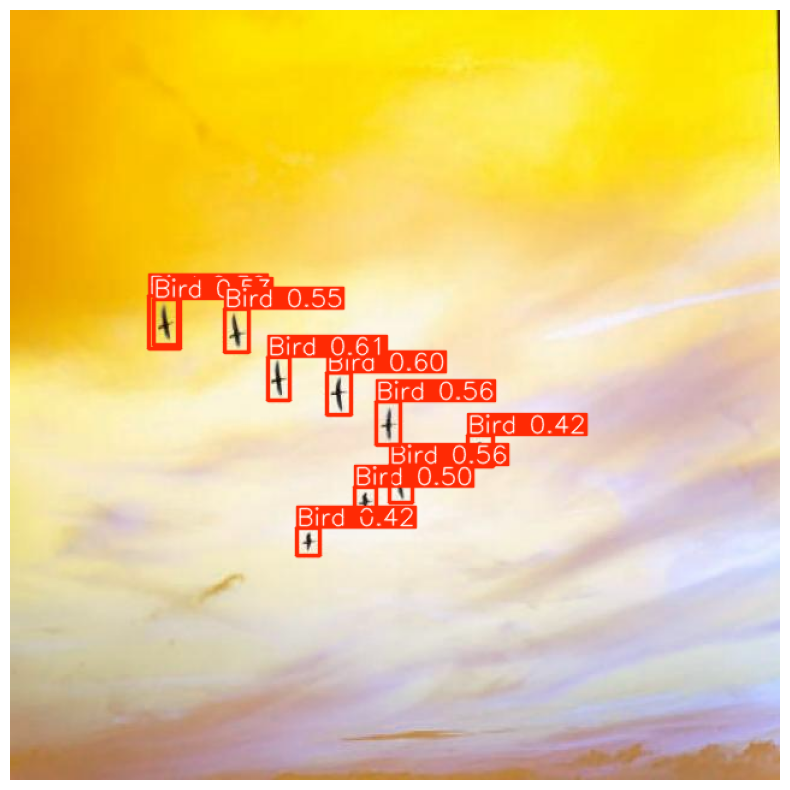

In [ ]:
results = modelv11n_best_ep70.predict(
    source="/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg"
)

annotated = results[0].plot()

plt.figure(figsize=(10,10))
plt.imshow(annotated)
plt.axis("off")

for box in results[0].boxes:
    conf = float(box.conf)
    xyxy = box.xyxy[0].tolist()
    print(f"Confidence: {conf:.3f}, BBox: {xyxy}")

=> une seule box est compté 2 fois

## Comparaison 20 VS 70 epoch

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

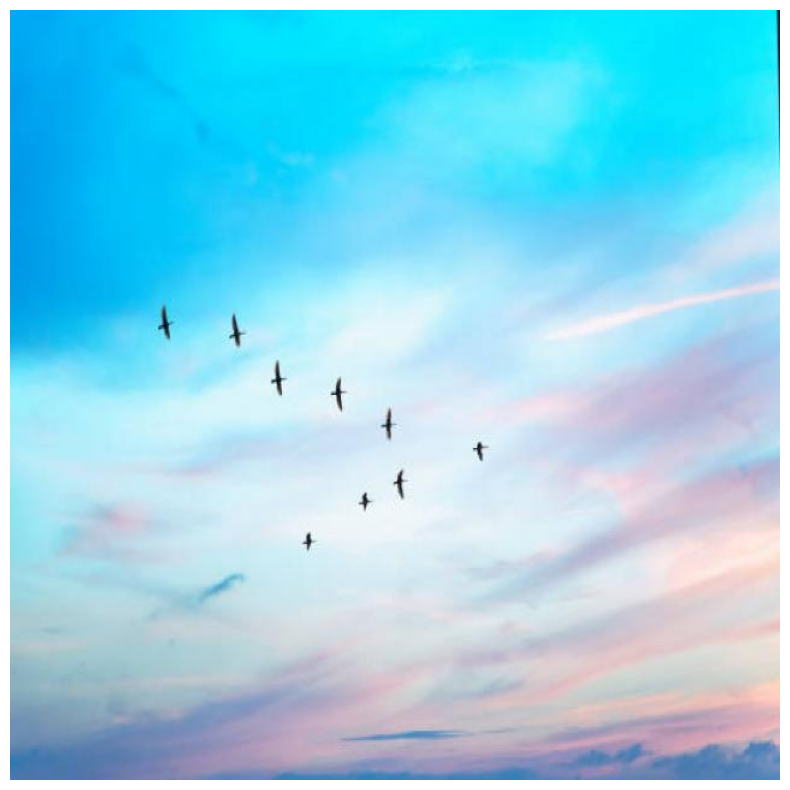

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")


9 oiseaux

| Critère                      | 20 epochs                              | 70 epochs                      |
| ---------------------------- | -------------------------------------- | ------------------------------ |
| Nombre de boxes détectées | **15 boxes**                           | **10 boxes**                   |
| Avec score > 0.40         | **4**                                  | **8**                          |
| Avec score > 0.50         | **0**                                  | **6**                          |
| -------------- | --------- | --------- |
| Score moyen    | **0.350** | **0.519** |
| Meilleur score | **0.425** | **0.605** |
| Pire score     | **0.272** | **0.296** |



In [ ]:
model_20 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep20.pt")
model_70 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep70.pt")


In [ ]:
# --- Prediction simple ---
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)
    return results


# --- Dessiner les résultats ---
def draw_predictions(img, results, color=(0, 0, 255), thickness=2):
    img = img.copy()
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = float(box.conf[0])

            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
            cv2.putText(img, f"{result.names[cls]} {conf:.2f}",
                        (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, color, 2)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [ ]:
def draw_ground_truth(image_path, label_path, label_map, thickness=2):
    image = cv2.imread(image_path)
    h, w, _ = image.shape

    if not os.path.exists(label_path):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with open(label_path, "r") as f:
        for line in f:
            cls, xc, yc, bw, bh = map(float, line.split())
            cls = int(cls)

            # convertir YOLO -> pixels
            x1 = int((xc - bw / 2) * w)
            y1 = int((yc - bh / 2) * h)
            x2 = int((xc + bw / 2) * w)
            y2 = int((yc + bh / 2) * h)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), thickness)
            cv2.putText(image, label_map[cls], (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



0: 640x640 1 Bird, 387.9ms
Speed: 12.4ms preprocess, 387.9ms inference, 32.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 Birds, 189.3ms
Speed: 3.5ms preprocess, 189.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


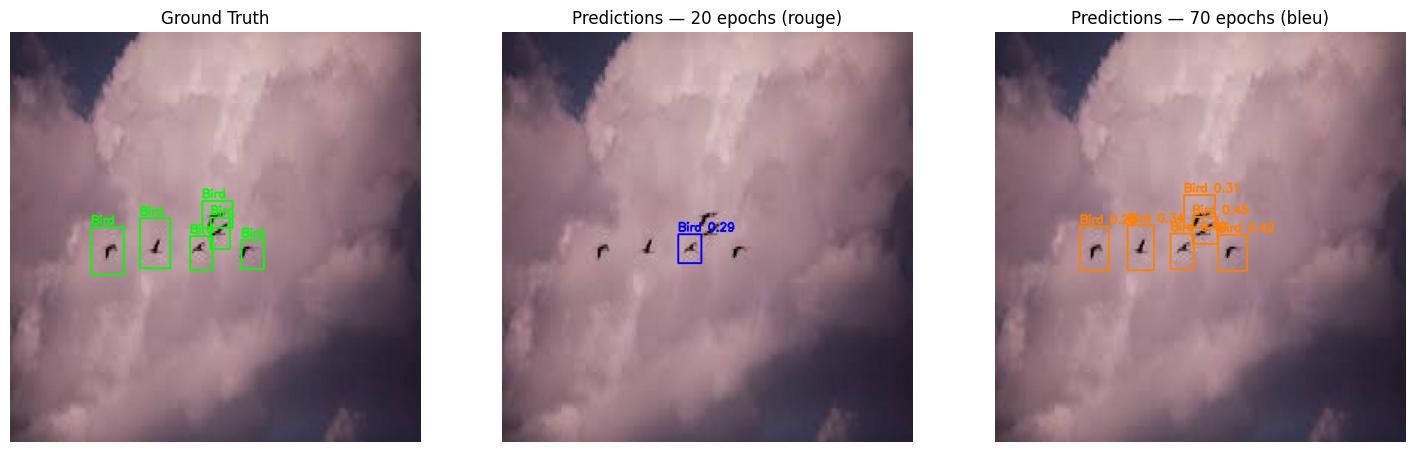


0: 640x640 1 Bird, 193.5ms
Speed: 3.6ms preprocess, 193.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bird, 198.3ms
Speed: 5.5ms preprocess, 198.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


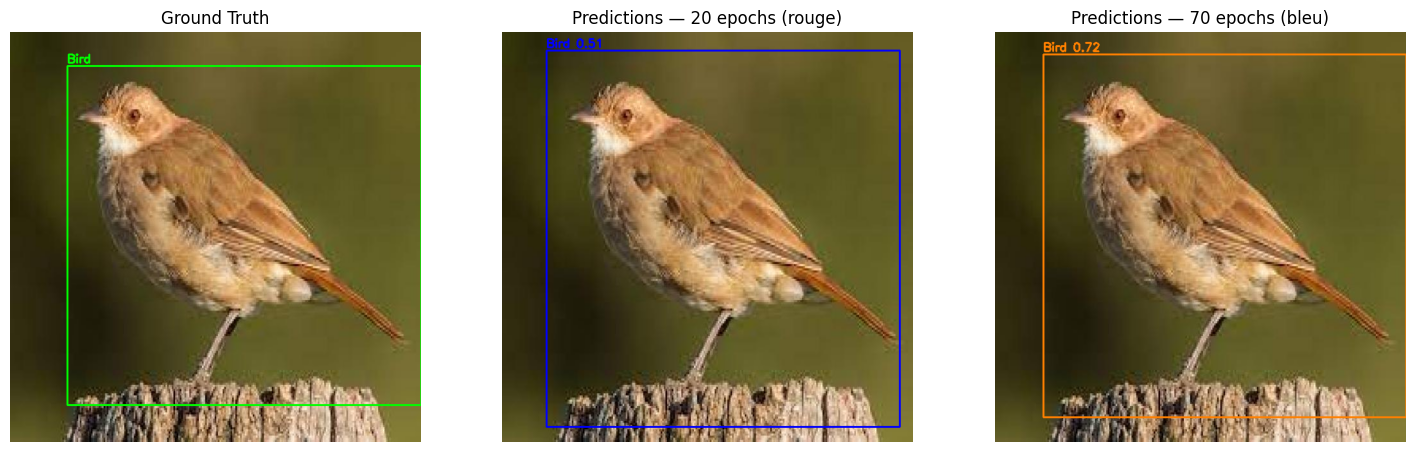


0: 640x640 10 Birds, 187.9ms
Speed: 6.5ms preprocess, 187.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 Birds, 187.7ms
Speed: 7.2ms preprocess, 187.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


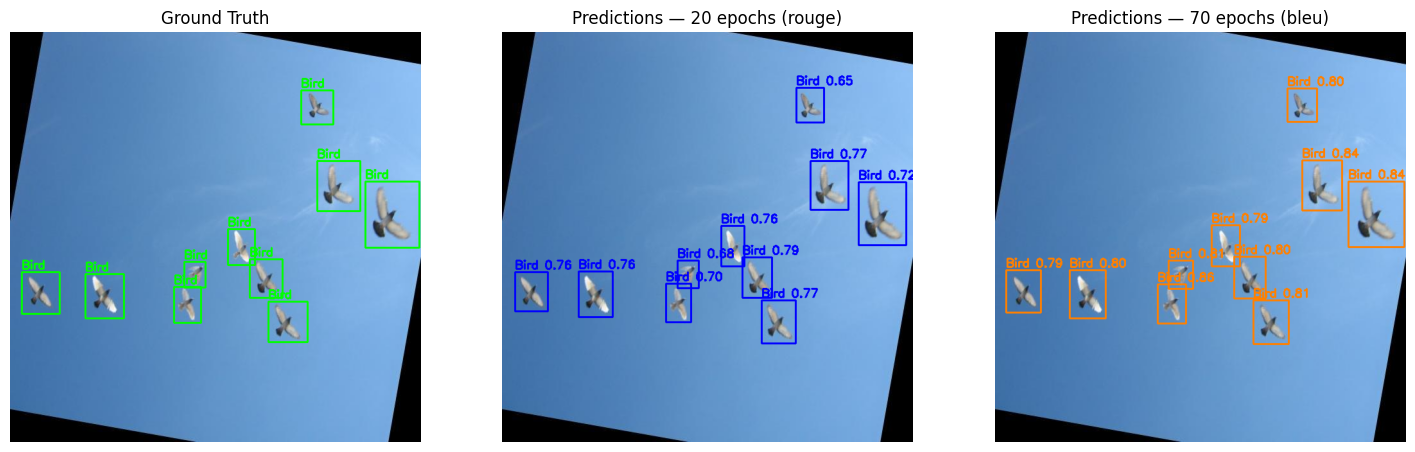


0: 640x640 3 Birds, 195.1ms
Speed: 5.8ms preprocess, 195.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Birds, 186.8ms
Speed: 4.3ms preprocess, 186.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


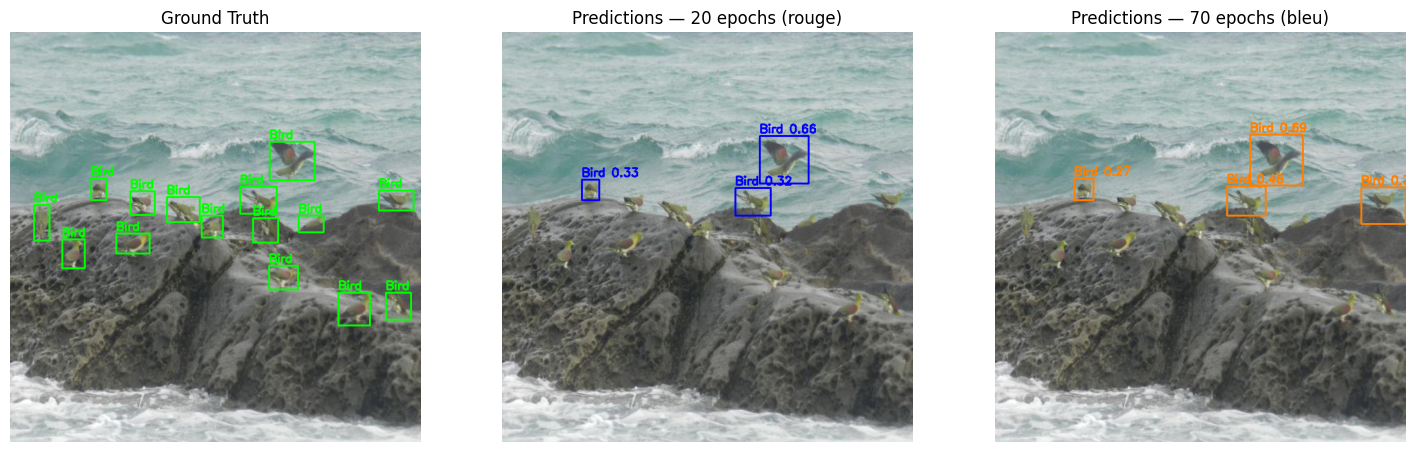


0: 640x640 2 Birds, 182.6ms
Speed: 7.0ms preprocess, 182.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bird, 208.9ms
Speed: 6.4ms preprocess, 208.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


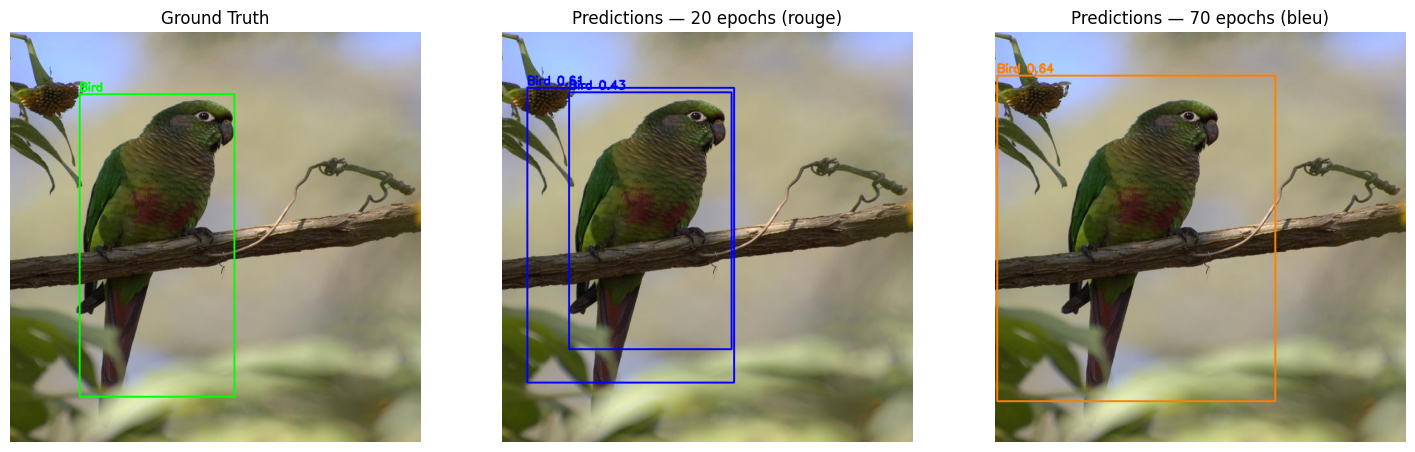


0: 640x640 1 Bird, 197.6ms
Speed: 4.8ms preprocess, 197.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bird, 191.4ms
Speed: 4.0ms preprocess, 191.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


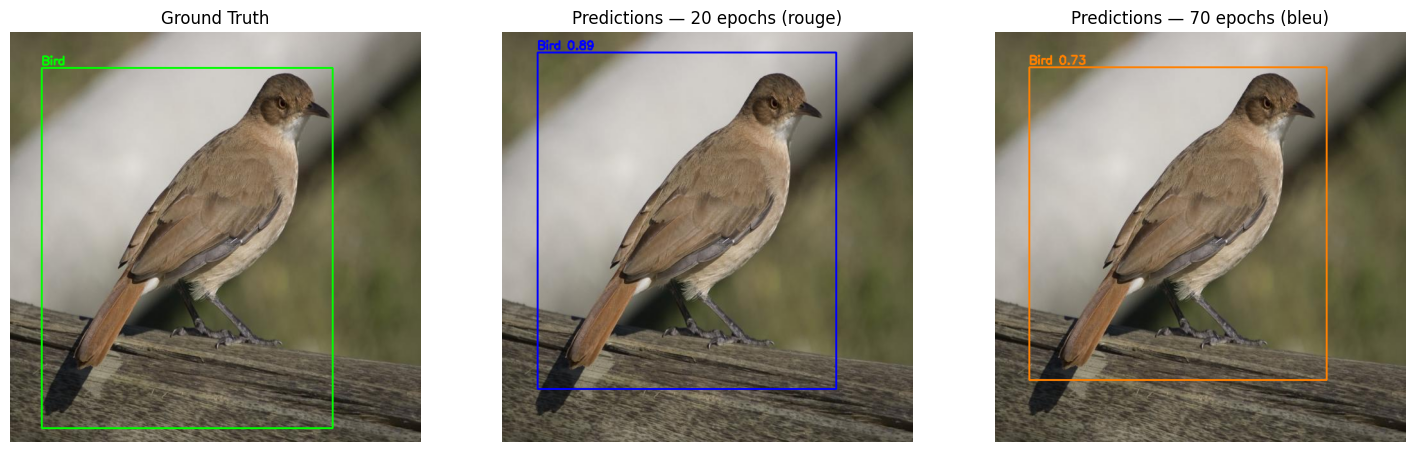


0: 640x640 3 Birds, 189.2ms
Speed: 6.7ms preprocess, 189.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Birds, 198.3ms
Speed: 7.9ms preprocess, 198.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


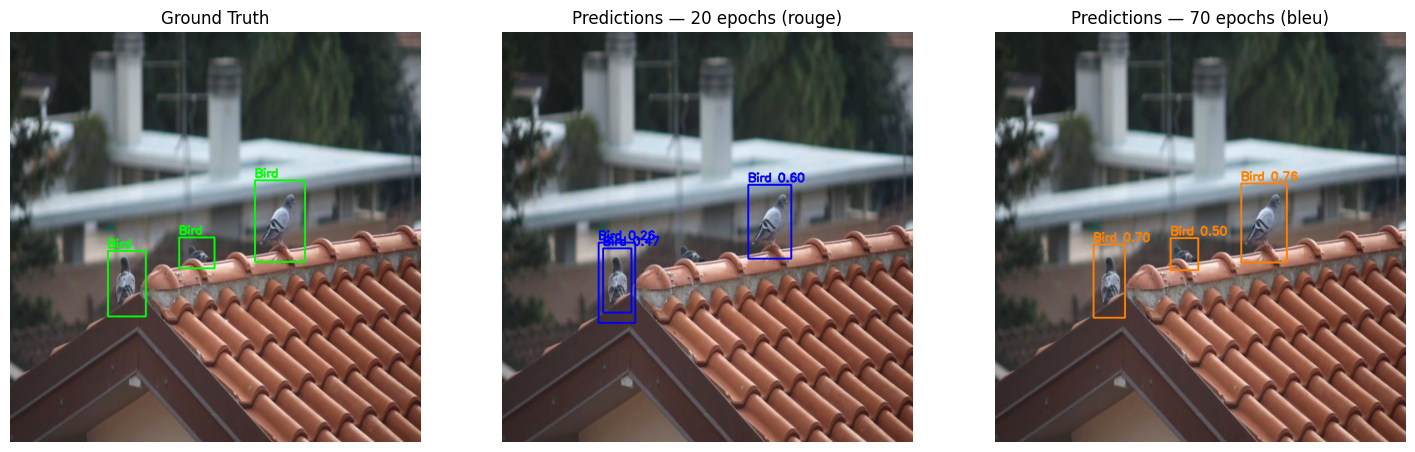


0: 640x640 21 Birds, 247.7ms
Speed: 6.0ms preprocess, 247.7ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 Birds, 300.9ms
Speed: 7.9ms preprocess, 300.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


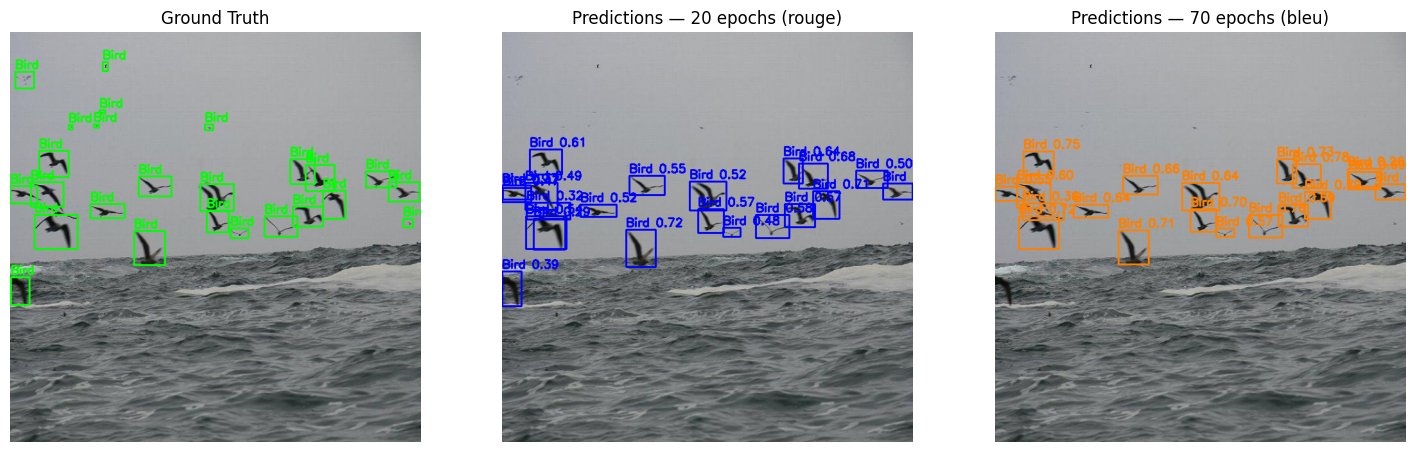

In [ ]:
# === CHEMINS DES DONNEES ===
DATASET_PATH = "/content/drive/MyDrive/Bird_Only.v1i.yolov11"
test_img_dir = f"{DATASET_PATH}/test/images"
test_label_dir = f"{DATASET_PATH}/test/labels"

image_files = [f for f in os.listdir(test_img_dir) if f.endswith(".jpg")]

# pour les noms des classes
label_map = model_70.names  # unique classe "Bird"

# === AFFICHAGE COMPARATIF ===
for img_name in image_files[:8]:  # afficher les 8 premières images
    img_path = f"{test_img_dir}/{img_name}"
    label_path = f"{test_label_dir}/{img_name.replace('.jpg', '.txt')}"

    # GT
    gt_img = draw_ground_truth(img_path, label_path, label_map)

    # Prediction 20 epochs
    img20 = cv2.imread(img_path)
    pred20 = predict(model_20, img20, conf=0.25)
    pred_img20 = draw_predictions(img20, pred20, color=(255, 0, 0))  # rouge

    # Prediction 70 epochs
    img70 = cv2.imread(img_path)
    pred70 = predict(model_70, img70, conf=0.25)
    pred_img70 = draw_predictions(img70, pred70, color=(0, 128, 255))  # bleu/orange

    # === PLOT ===
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(gt_img)
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(pred_img20)
    plt.title("Predictions — 20 epochs (rouge)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_img70)
    plt.title("Predictions — 70 epochs (bleu)")
    plt.axis("off")

    plt.show()


## YOLO11s - 60 epoch

In [ ]:
import shutil

In [ ]:
from ultralytics import YOLO

modelv11s_ep60 = YOLO("yolo11s.pt")
modelv11s_ep60.train(
    data=DATASET_PATH,
    epochs=60,
    imgsz=640,
    batch=16,
    name="bird_v11s_train60"
)

SOURCE = "/content/runs/detect/bird_v11s_train60/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11s_best_ep60.pt"

shutil.copy(SOURCE, DEST)
print("Modèle YOLO11s (60 epochs) sauvegardé :", DEST)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11s_train602, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

NameError: name 'shutil' is not defined

In [ ]:

#SOURCE = "/content/runs/detect/bird_v11s_train602/weights/best.pt"

shutil.copy(SOURCE, DEST)
print("Modèle YOLO11s (60 epochs) sauvegardé :", DEST)

Modèle YOLO11s (60 epochs) sauvegardé : /content/drive/MyDrive/bird_v11s_best_ep60.pt



image 1/1 /content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg: 640x640 12 Birds, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Confidence: 0.523, BBox: [306.053466796875, 327.3160400390625, 322.13055419921875, 360.6849365234375]
Confidence: 0.473, BBox: [214.77316284179688, 288.7156066894531, 232.45571899414062, 324.2177429199219]
Confidence: 0.466, BBox: [315.82965087890625, 379.5379638671875, 333.16534423828125, 410.567626953125]
Confidence: 0.460, BBox: [263.5367431640625, 300.3535461425781, 284.7586669921875, 338.6573791503906]
Confidence: 0.445, BBox: [178.9266357421875, 248.5317840576172, 198.78045654296875, 285.00274658203125]
Confidence: 0.402, BBox: [285.9519348144531, 398.3927001953125, 303.8334045410156, 420.3831787109375]
Confidence: 0.370, BBox: [239.94973754882812, 430.2153625488281, 258.4815673828125, 454.8833312988281]
Confidence: 0.368, BBox: [120.1634979248046

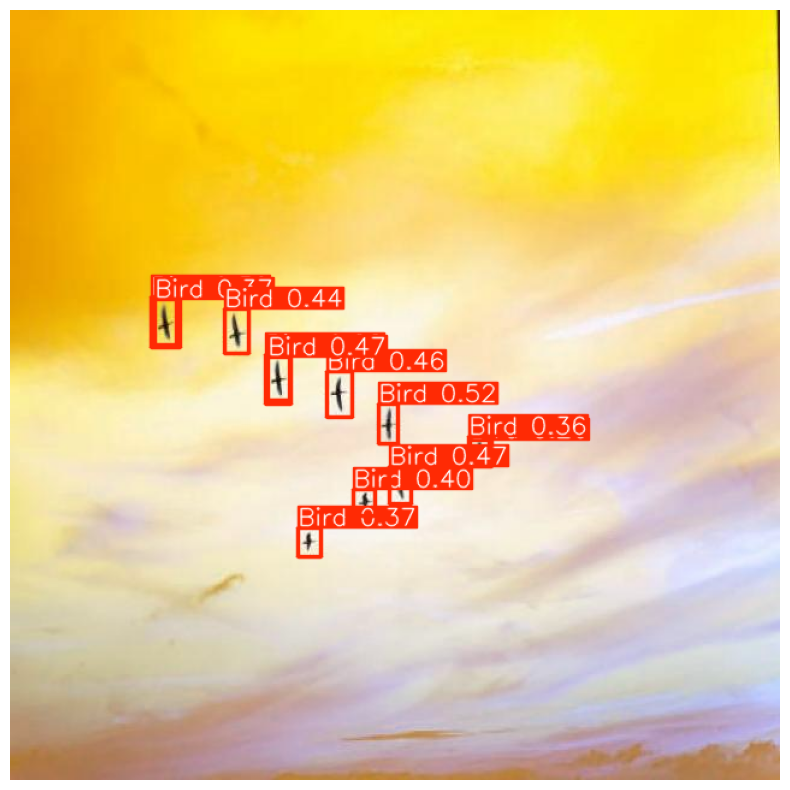

In [ ]:
results = modelv11s_ep60.predict(
    source="/content/drive/MyDrive/Bird_Only.v1i.yolov11/test/images/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg"
)

annotated = results[0].plot()

plt.figure(figsize=(10,10))
plt.imshow(annotated)
plt.axis("off")

for box in results[0].boxes:
    conf = float(box.conf)
    xyxy = box.xyxy[0].tolist()
    print(f"Confidence: {conf:.3f}, BBox: {xyxy}")


0: 640x640 5 Birds, 15.8ms
Speed: 4.3ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


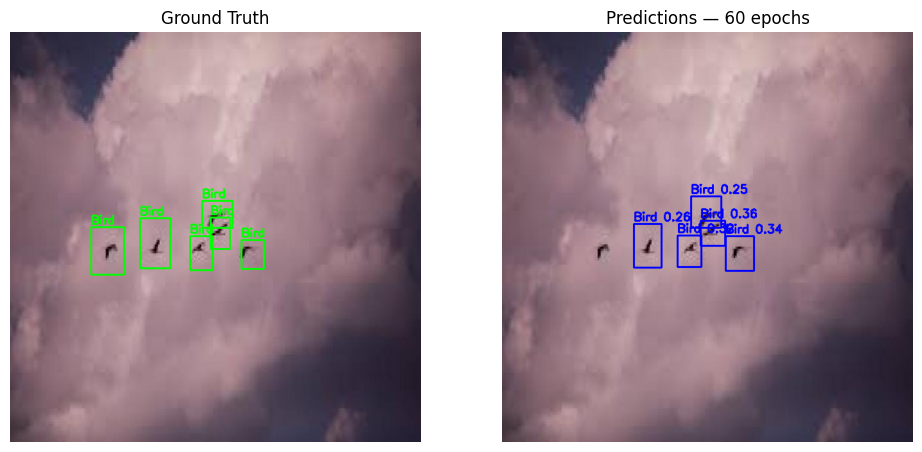


0: 640x640 1 Bird, 15.7ms
Speed: 2.4ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


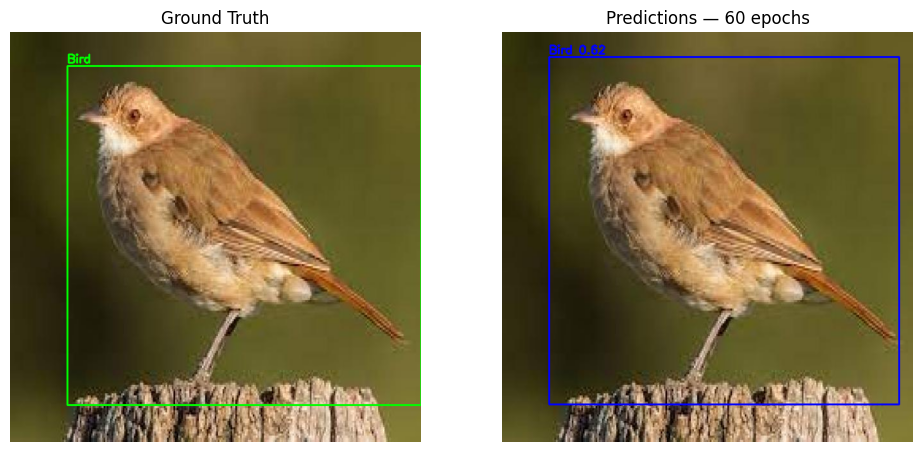


0: 640x640 10 Birds, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


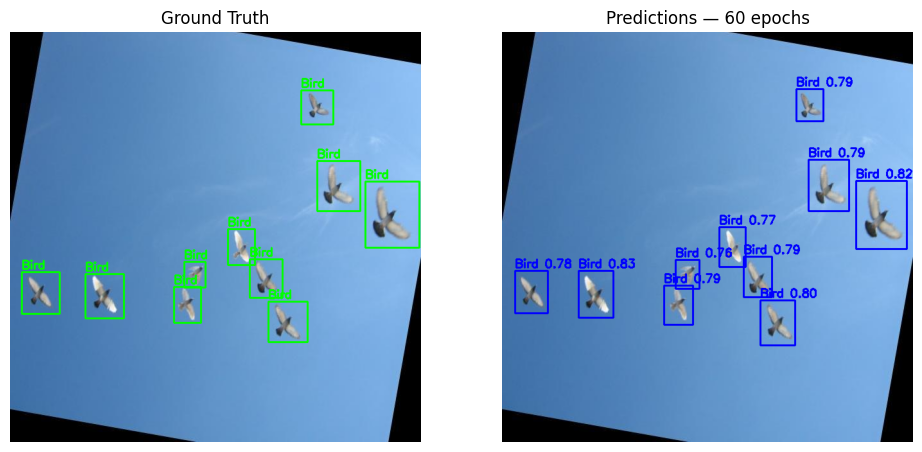


0: 640x640 2 Birds, 15.7ms
Speed: 2.9ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


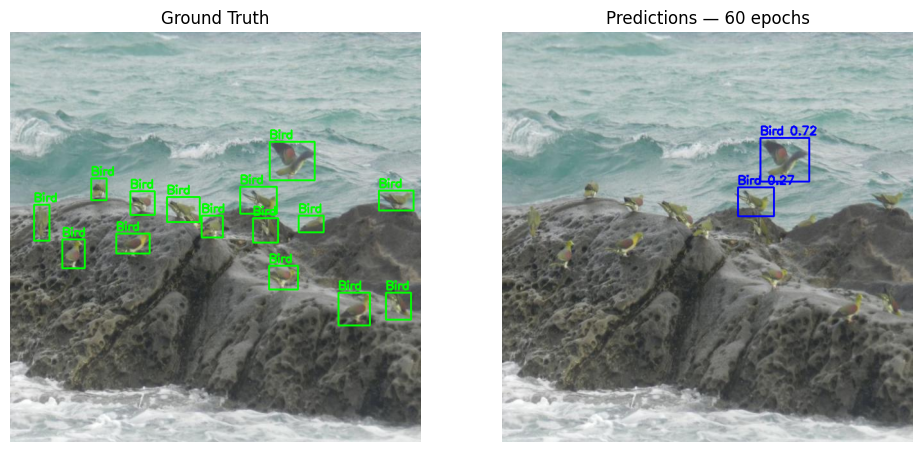


0: 640x640 4 Birds, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


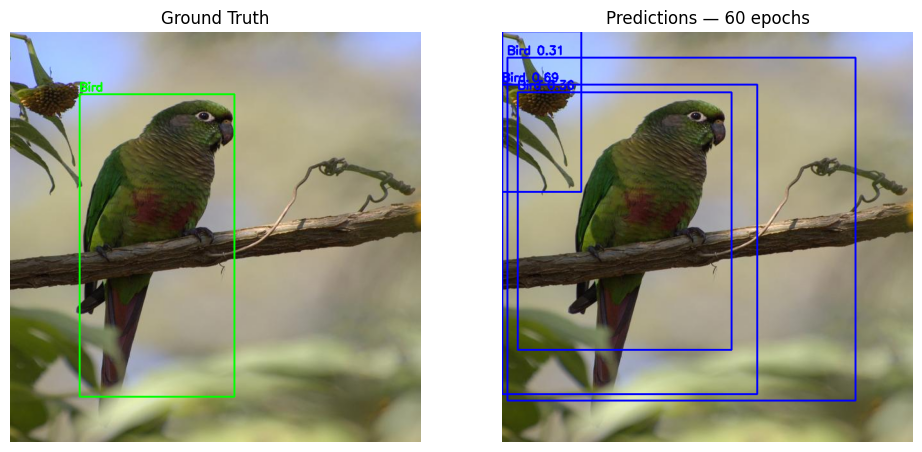


0: 640x640 1 Bird, 15.8ms
Speed: 2.6ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


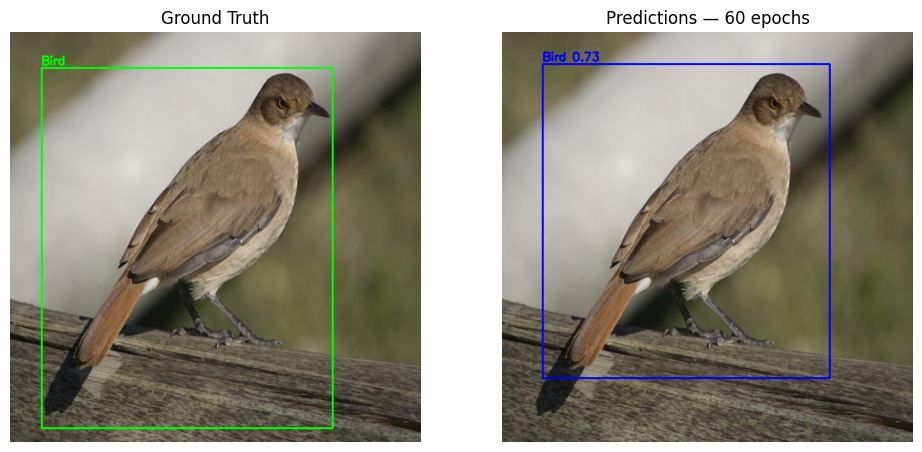


0: 640x640 3 Birds, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


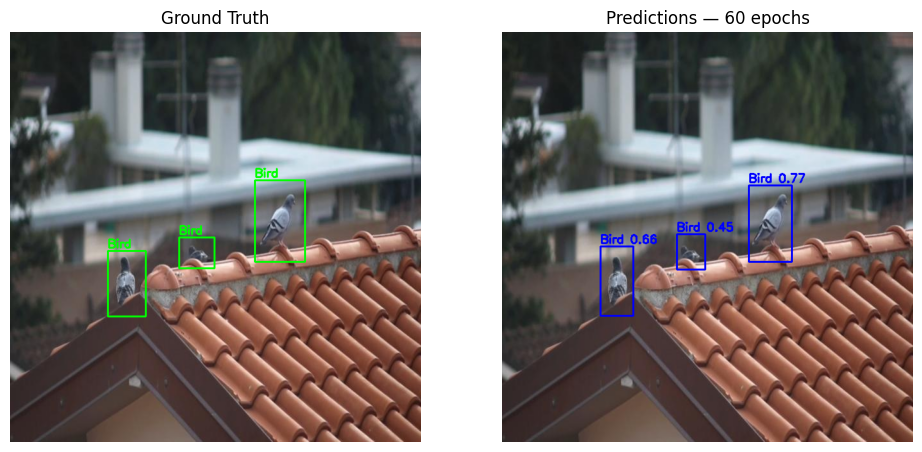


0: 640x640 21 Birds, 15.7ms
Speed: 3.2ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


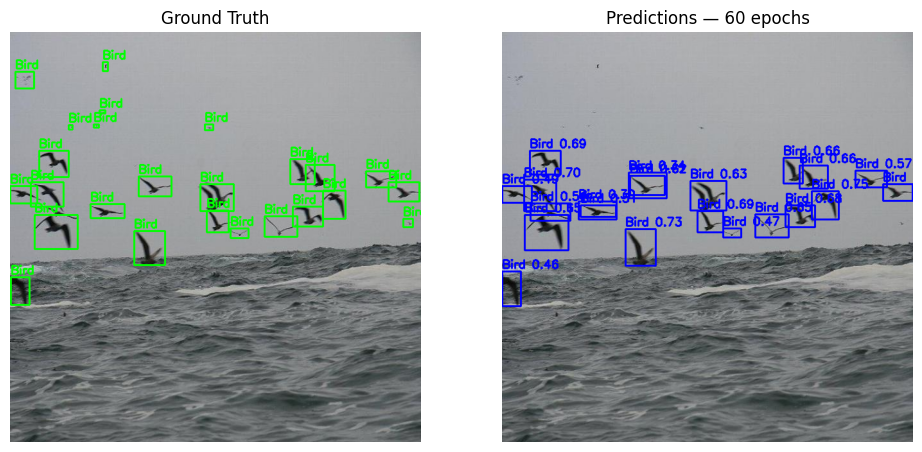

In [ ]:
# === CHEMINS DES DONNEES ===
DATASET_PATH = "/content/drive/MyDrive/Bird_Only.v1i.yolov11"
test_img_dir = f"{DATASET_PATH}/test/images"
test_label_dir = f"{DATASET_PATH}/test/labels"

image_files = [f for f in os.listdir(test_img_dir) if f.endswith(".jpg")]

# pour les noms des classes
label_map = modelv11s_ep60.names  # unique classe "Bird"

# === AFFICHAGE COMPARATIF ===
for img_name in image_files[:8]:  # afficher les 8 premières images
    img_path = f"{test_img_dir}/{img_name}"
    label_path = f"{test_label_dir}/{img_name.replace('.jpg', '.txt')}"

    # GT
    gt_img = draw_ground_truth(img_path, label_path, label_map)

    # Prediction 60 epochs
    img60 = cv2.imread(img_path)
    pred60 = predict(modelv11s_ep60, img60, conf=0.25)
    pred_img60 = draw_predictions(img60, pred60, color=(255, 0, 0))

    # === PLOT ===
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(gt_img)
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(pred_img60)
    plt.title("Predictions — 60 epochs")
    plt.axis("off")

    plt.show()


## YOLO11n - 200 epoch

In [4]:
start_time = time.time()

model = YOLO("yolo11n.pt")

results = model.train(
    data=DATASET_PATH,
    epochs=200,
    imgsz=640,
    batch=16,
    name="bird_v11_train"
)

end_time = time.time()

print(f"\n⏱️ Temps total d'entraînement : { (end_time - start_time)/60:.2f} minutes")

Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

In [5]:
import shutil

SOURCE = "/content/runs/detect/bird_v11_train/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11n_best_ep200.pt"

shutil.copy(SOURCE, DEST)

print("✔️ Modèle sauvegardé dans le Drive :", DEST)

✔️ Modèle sauvegardé dans le Drive : /content/drive/MyDrive/bird_v11n_best_ep200.pt


In [6]:
modelv11n_best_ep200 = YOLO("/content/drive/MyDrive/bird_v11n_best_ep200.pt")

In [11]:
# --- Prediction simple ---
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)
    return results


# --- Dessiner les résultats ---
def draw_predictions(img, results, color=(0, 0, 255), thickness=2):
    img = img.copy()
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = float(box.conf[0])

            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
            cv2.putText(img, f"{result.names[cls]} {conf:.2f}",
                        (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, color, 2)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [9]:
def draw_ground_truth(image_path, label_path, label_map, thickness=2):
    image = cv2.imread(image_path)
    h, w, _ = image.shape

    if not os.path.exists(label_path):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with open(label_path, "r") as f:
        for line in f:
            cls, xc, yc, bw, bh = map(float, line.split())
            cls = int(cls)

            # convertir YOLO -> pixels
            x1 = int((xc - bw / 2) * w)
            y1 = int((yc - bh / 2) * h)
            x2 = int((xc + bw / 2) * w)
            y2 = int((yc + bh / 2) * h)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), thickness)
            cv2.putText(image, label_map[cls], (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



0: 640x640 5 Birds, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


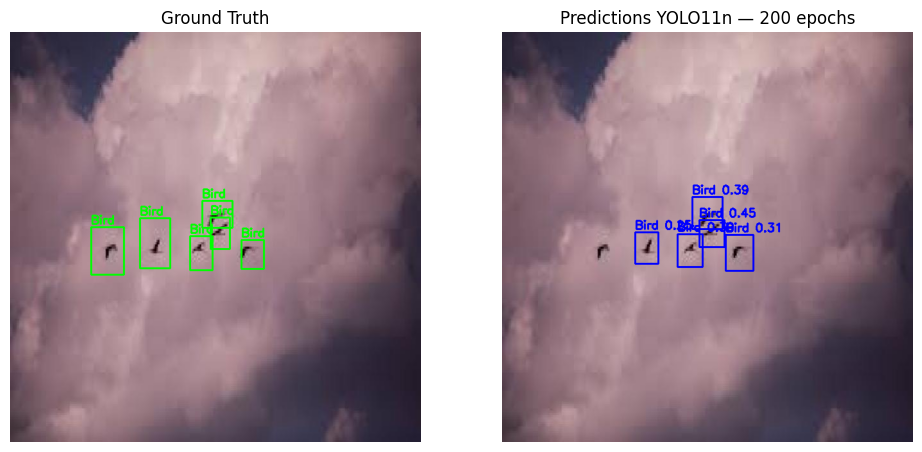


0: 640x640 1 Bird, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


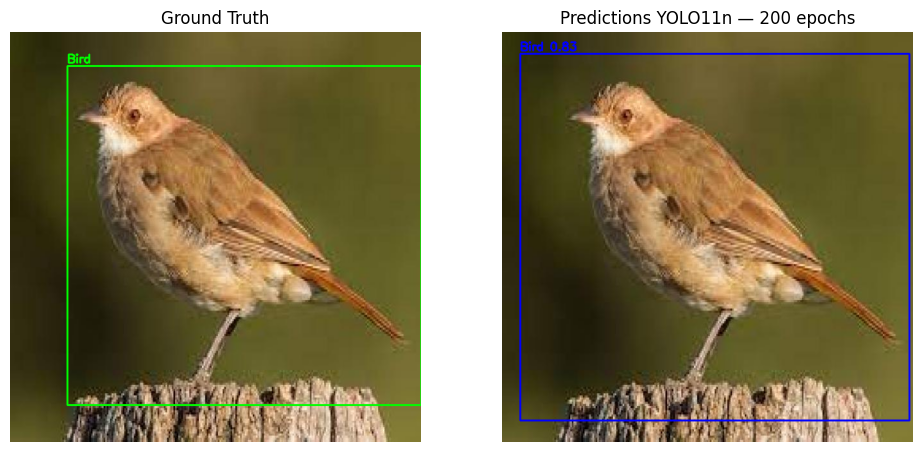


0: 640x640 10 Birds, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


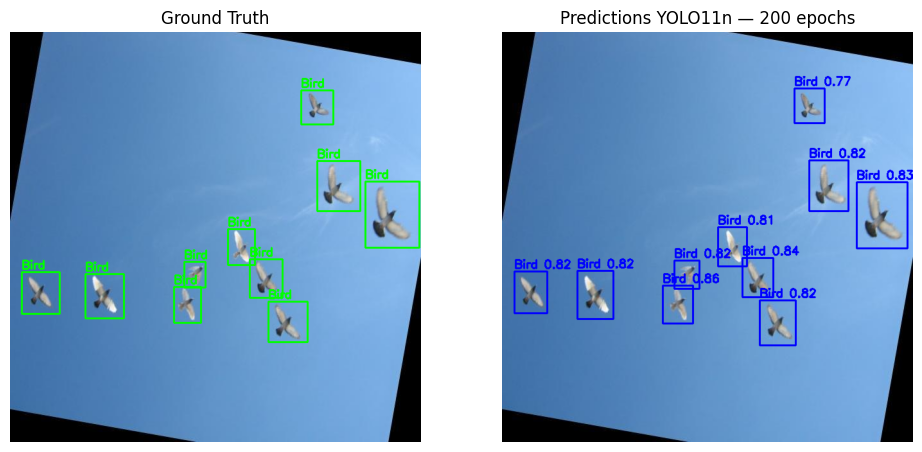


0: 640x640 5 Birds, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


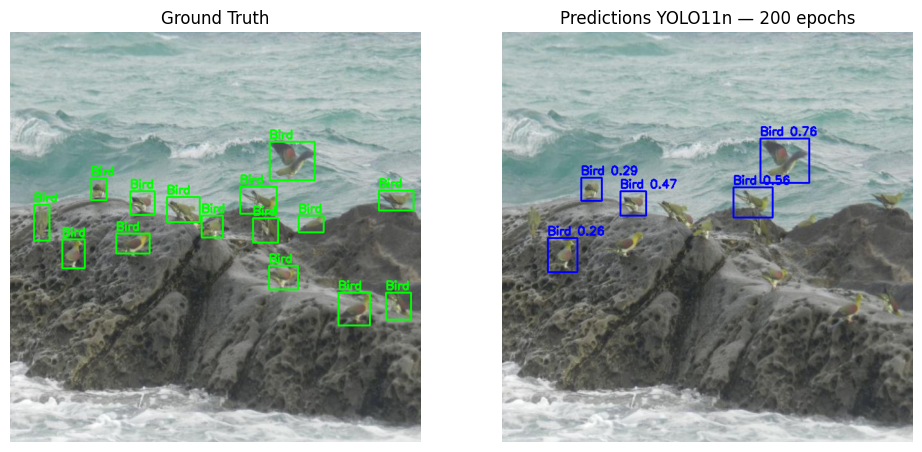


0: 640x640 1 Bird, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


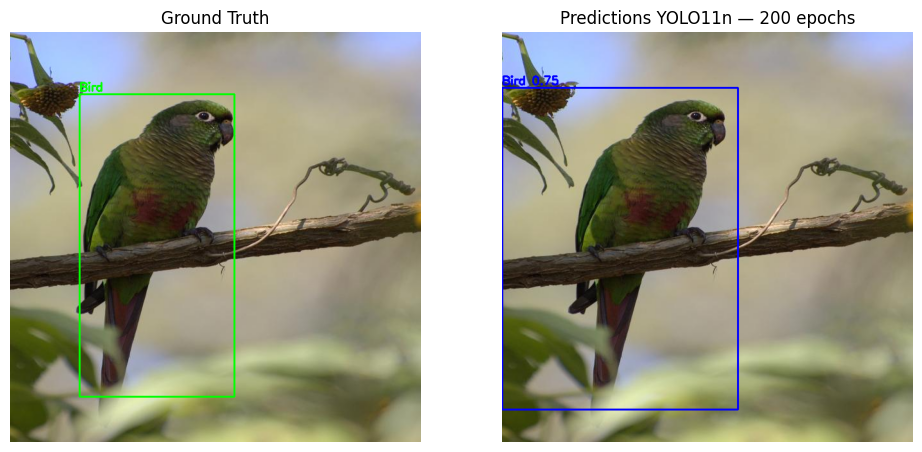


0: 640x640 1 Bird, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


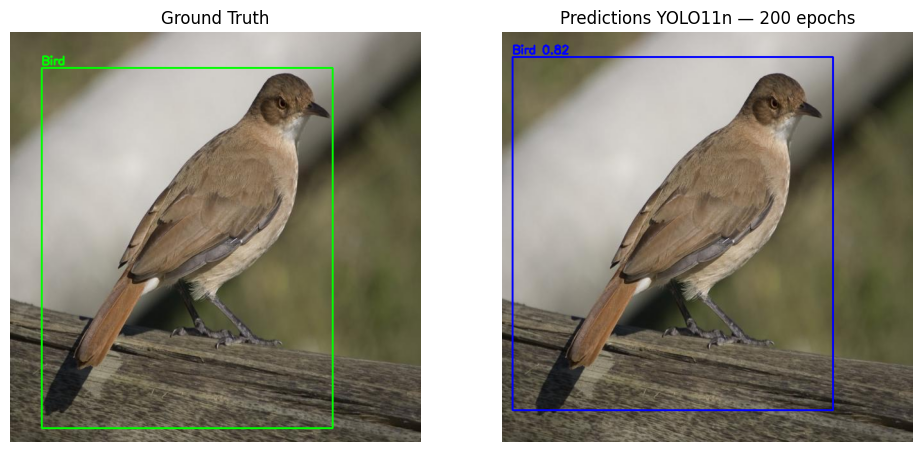


0: 640x640 3 Birds, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


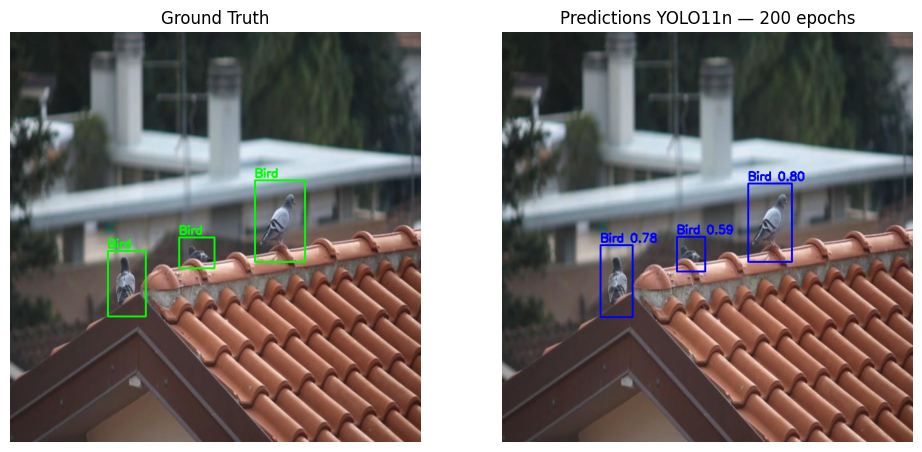


0: 640x640 19 Birds, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


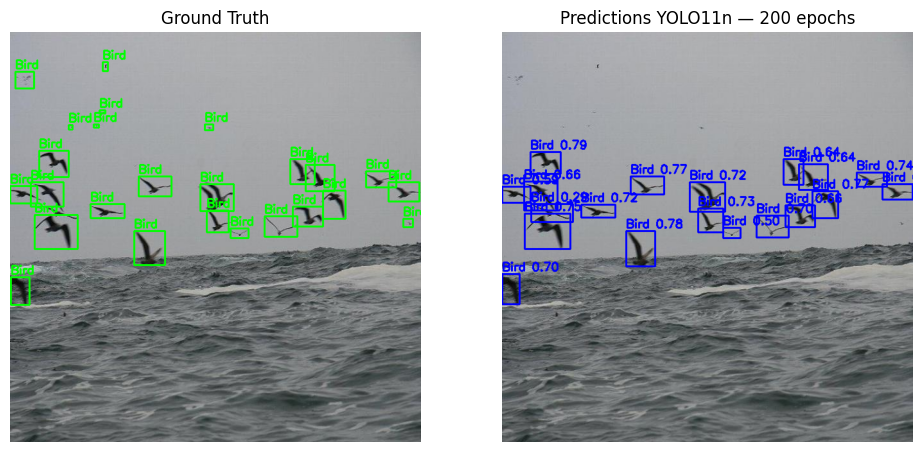

In [12]:
# === CHEMINS DES DONNEES ===
DATASET_PATH = "/content/drive/MyDrive/Bird_Only.v1i.yolov11"
test_img_dir = f"{DATASET_PATH}/test/images"
test_label_dir = f"{DATASET_PATH}/test/labels"

image_files = [f for f in os.listdir(test_img_dir) if f.endswith(".jpg")]

# pour les noms des classes
label_map = modelv11n_best_ep200.names  # unique classe "Bird"

# === AFFICHAGE COMPARATIF ===
for img_name in image_files[:8]:  # afficher les 8 premières images
    img_path = f"{test_img_dir}/{img_name}"
    label_path = f"{test_label_dir}/{img_name.replace('.jpg', '.txt')}"

    # GT
    gt_img = draw_ground_truth(img_path, label_path, label_map)

    # Prediction 200 epochs
    img60 = cv2.imread(img_path)
    pred60 = predict(modelv11n_best_ep200, img60, conf=0.25)
    pred_img60 = draw_predictions(img60, pred60, color=(255, 0, 0))

    # === PLOT ===
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(gt_img)
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(pred_img60)
    plt.title("Predictions YOLO11n — 200 epochs")
    plt.axis("off")

    plt.show()
